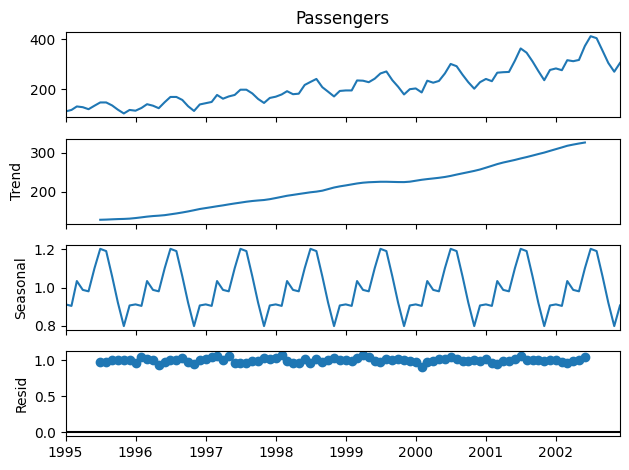

In [18]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_excel('Airlines+Data.xlsx',
					index_col ='Month',
					parse_dates = True)

# Print the first five rows of the dataset
airline.head()

# Print the first five rows of the dataset
airline.head()

# ETS Decomposition
result = seasonal_decompose(airline['Passengers'],
							model ='multiplicative')

# ETS plot
result.plot()
plt.show()


In [24]:
airline.isnull().sum()

Passengers    0
dtype: int64

In [19]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Thu, 28 Mar 2024   AIC                            615.965
Time:                                    13:34:49   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
				order = (1, 1, 0),
				seasonal_order =(1, 1, 0, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -262.555
Date:                            Thu, 28 Mar 2024   AIC                            531.110
Time:                                    13:34:49   BIC                            537.898
Sample:                                01-01-1995   HQIC                           533.810
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377      0.108     -2.204      0.028      -0.449      -0.026
ar.S.L12      -0.2595      0.097     -2.685      0.007      -0.449      -0.070
sigma2        94.2022     16.779      5.614      0.000      61.315     127.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.60   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

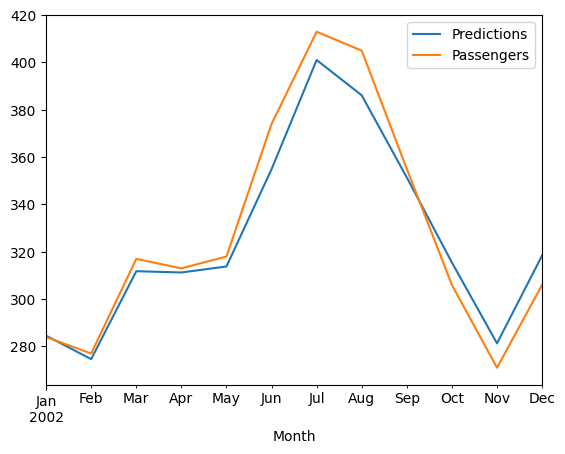

In [21]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [22]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test["Passengers"], predictions))

# Calculate mean squared error
mean_squared_error(test["Passengers"], predictions)

10.33167587467119


106.74352637926268

<Axes: xlabel='Month'>

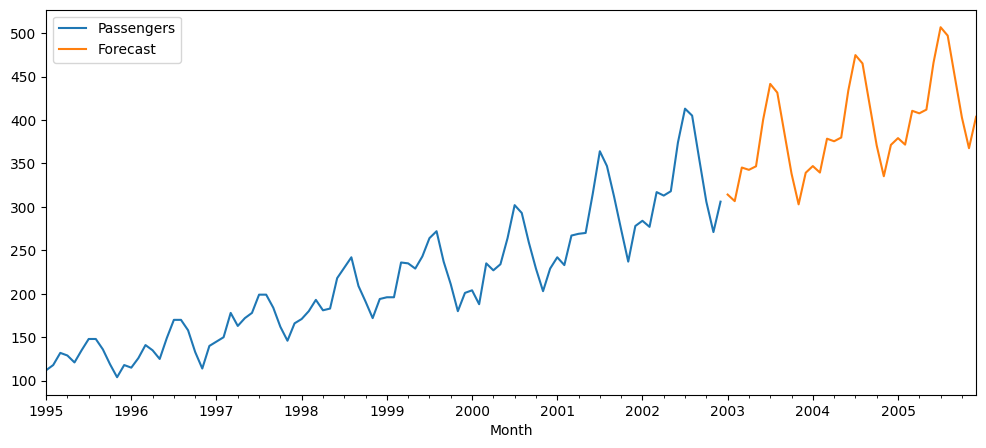

In [23]:
# Train the model on the full dataset
model = model = SARIMAX(airline['Passengers'],
						order = (1, 1, 0),
						seasonal_order =(1, 1, 0, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 3 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)